In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score
import sklearn.model_selection as skm
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle as shf

In [5]:
# Load the datasets
y_test = np.load('/Users/happyeveryday/Downloads/Chest_xRay/Data/data_transformed/y_test.npy')
y_train = np.load('/Users/happyeveryday/Downloads/Chest_xRay/Data/data_transformed/y_train.npy')
X_test = np.load('/Users/happyeveryday/Downloads/Chest_xRay/Data/data_transformed/X_test.npy')
X_train = np.load('/Users/happyeveryday/Downloads/Chest_xRay/Data/data_transformed/X_train.npy')

In [101]:
print(y_train)

[1 1 1 ... 0 0 0]


In [6]:
loaded_X_test = X_test[...,0]
loaded_X_train = X_train[...,0]



In [8]:
X_test = loaded_X_test.reshape(624,64*64)
X_train = loaded_X_train.reshape(5216,64*64)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [105]:
print(y_train)
print(y_test)

[1 1 1 ... 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [11]:
number_of_trees = [10,30,40,50,70,80,90,100,200,300,400]
Test_error_list = []

for n in number_of_trees:
    RF_class = RFC(n_estimators=n, random_state=123, max_features=round(np.sqrt(X_train.shape[1])))
    RF_class.fit(X_train, y_train)
    RF_class_pred = RF_class.predict(X_test)
    Test_error_list.append(1 - accuracy_score(y_test, RF_class_pred))

for n, test_error in zip(number_of_trees, Test_error_list):
    print(f"Number of trees: {n}, Test error: {test_error}")

Test_error_list_rounded = [round(error, 2) for error in Test_error_list]

Number of trees: 10, Test error: 0.20512820512820518
Number of trees: 30, Test error: 0.21634615384615385
Number of trees: 40, Test error: 0.21955128205128205
Number of trees: 50, Test error: 0.22596153846153844
Number of trees: 70, Test error: 0.23397435897435892
Number of trees: 80, Test error: 0.22275641025641024
Number of trees: 90, Test error: 0.22596153846153844
Number of trees: 100, Test error: 0.22115384615384615
Number of trees: 200, Test error: 0.21474358974358976
Number of trees: 300, Test error: 0.21474358974358976
Number of trees: 400, Test error: 0.21474358974358976


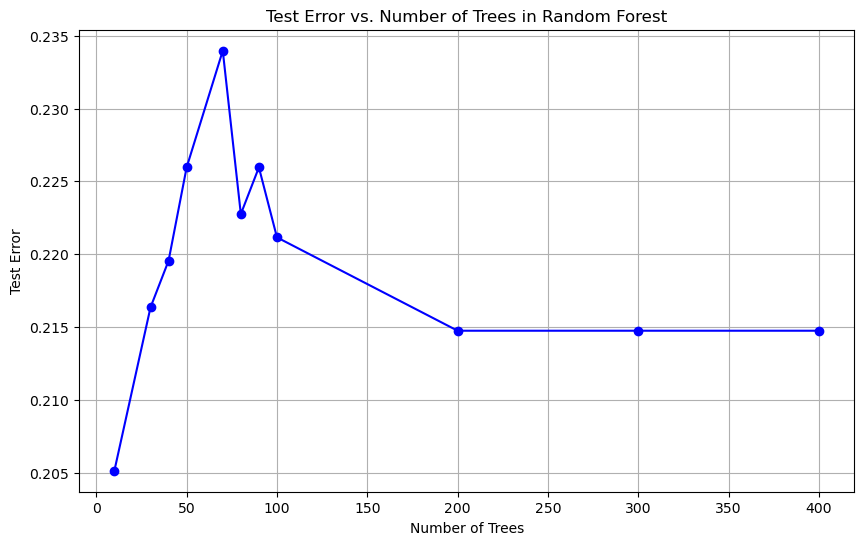

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, Test_error_list, marker='o', linestyle='-', color='b')
plt.title('Test Error vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.grid(True)

plt.show()